# Group 3 - Project 2
## Online Shopper Purchase Prediction

### Imports

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import model as Group3Models
from math import sin, pi
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from joblib import dump, load


### Read in CSV

In [3]:
"""Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q. https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset"""

online_shopping_df = pd.read_csv('Resources/online_shoppers_intention.csv')

### Preview Data

In [99]:
online_shopping_df.info()

online_shopping_df["VisitorType"].value_counts()
online_shopping_df["Month"].value_counts()

# online_shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

### Change strings to integers on a copy of the data set for EDA

In [100]:
online_shopping_df_without_strings = online_shopping_df.copy()
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
online_shopping_df_without_strings["Month"] = online_shopping_df_without_strings["Month"].map(months)

visitor = {'New_Visitor': 1, 'Returning_Visitor': 2, 'Other': 3}
online_shopping_df_without_strings["VisitorType"] = online_shopping_df_without_strings["VisitorType"].map(visitor)

### Visualize Distributions for EDA

<Figure size 1200x600 with 0 Axes>

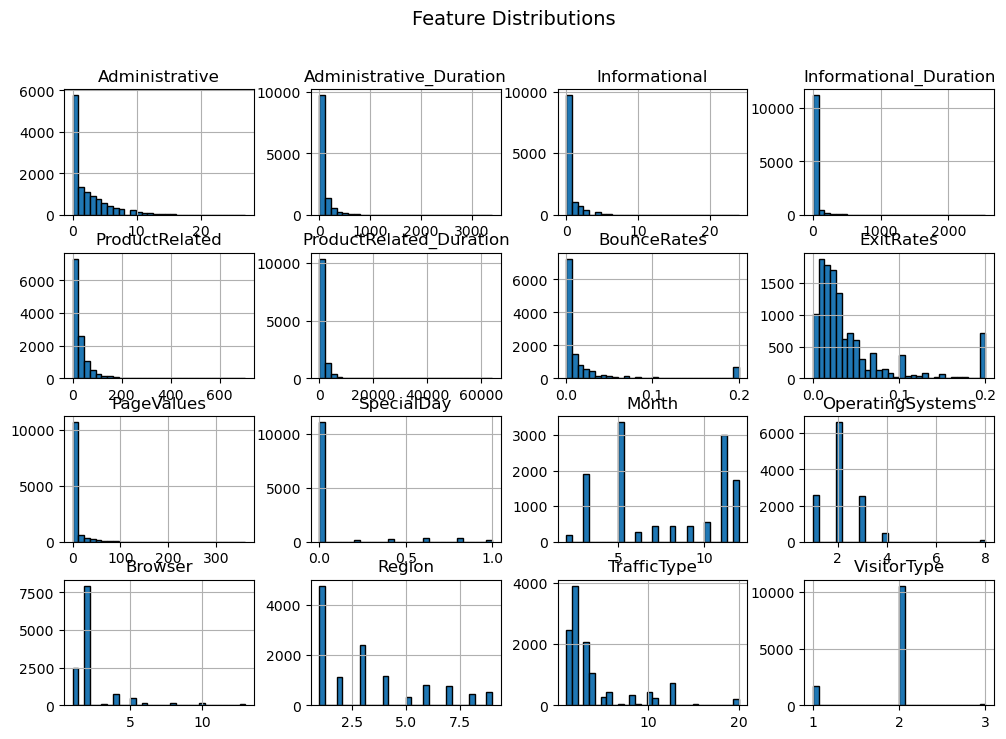


🔹 Boxplots for Outlier Detection


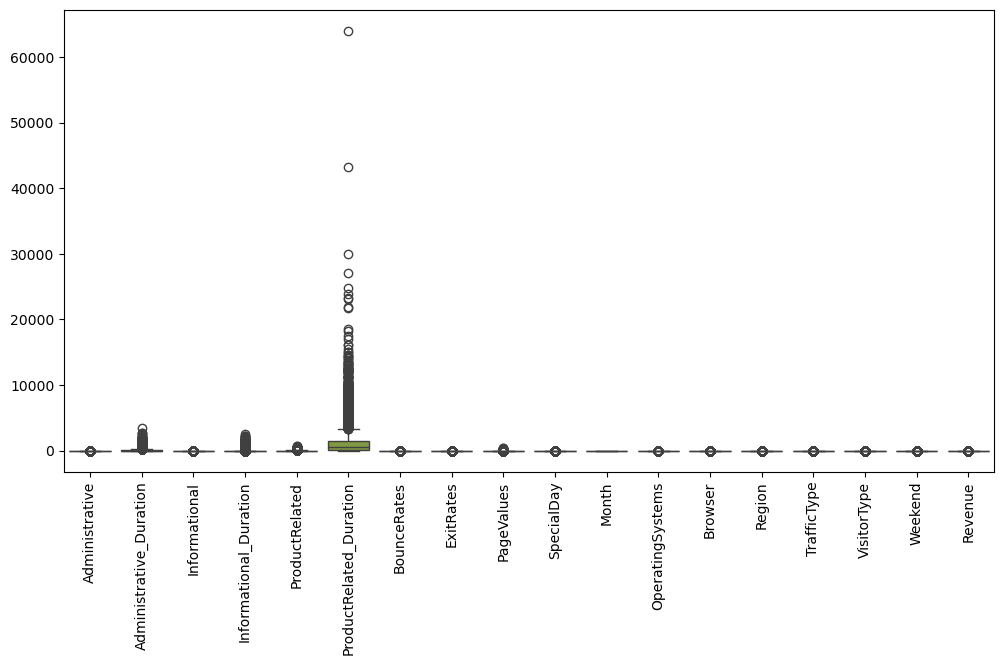


🔹 Correlation Heatmap


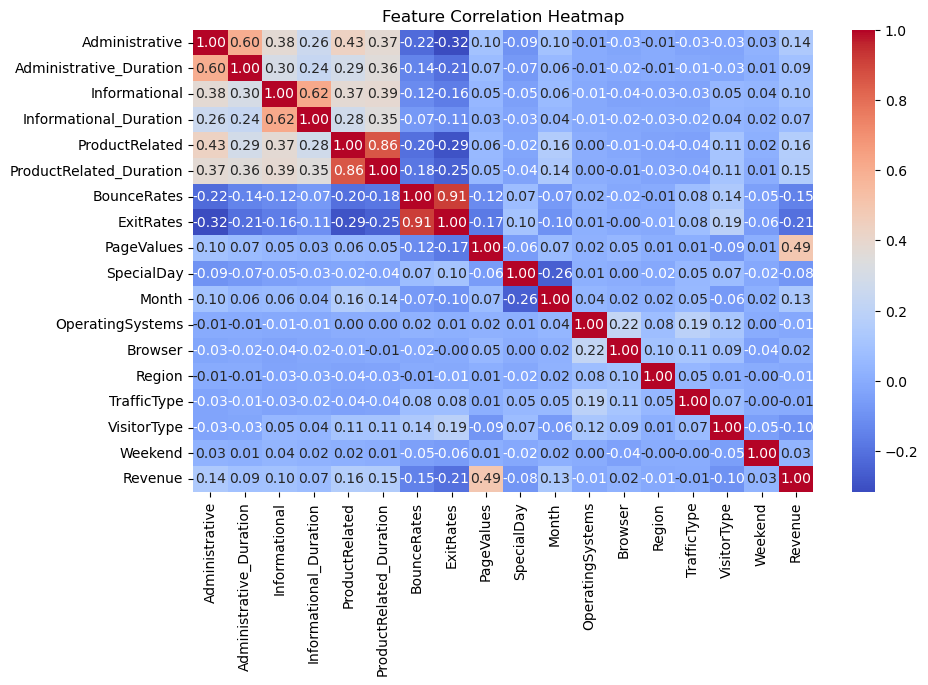

In [101]:
plt.figure(figsize=(12, 6))
online_shopping_df_without_strings.hist(figsize=(12, 8), bins=30, edgecolor="k")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

print("\n🔹 Boxplots for Outlier Detection")
plt.figure(figsize=(12, 6))
sns.boxplot(data=online_shopping_df_without_strings)
plt.xticks(rotation=90)
plt.show()

print("\n🔹 Correlation Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(online_shopping_df_without_strings.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Split data into training and test sets

In [102]:
#Drop the target column, setup X and y datasets for train test split
X = online_shopping_df.drop('Revenue', axis=1)
y = online_shopping_df['Revenue']

# Set seed for reproducibility
SEED = 42

#Train Test Split
X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=SEED)

### Scale and Encode Feature Columns

In [103]:
# Columns for numerical and categorical features
num_cols = ['PageValues', 'BounceRates', 'ExitRates']
cat_cols = ['VisitorType', 'Month']

# Ensure you fit the scaler on all numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])  # Fit on the training data
X_test[num_cols] = scaler.transform(X_test[num_cols])  # Use the same scaler for the test set

# Save the scaler for later use
dump(scaler, "scaler.pkl")

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)

# Check the updated columns
print(X_train.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')


In [104]:
# # Initialize the OrdinalEncoder and MinMaxScaler
# ordinal_encoder = OrdinalEncoder()
# min_max_scaler = MinMaxScaler()

# #Change Column to values created by encoder and scale them with the min max scaler
# X_train['VisitorType'] = ordinal_encoder.fit_transform(X_train['VisitorType'].values.reshape(-1, 1))
# X_train['VisitorType'] = min_max_scaler.fit_transform(X_train['VisitorType'].values.reshape(-1, 1))

# ordinal_encoder = OrdinalEncoder()
# min_max_scaler = MinMaxScaler()

# X_train['Month'] = X_train['Month'].apply(lambda x: sin(x*(pi * 6)))

# # Fit and transform the 'VisitorType' column with OrdinalEncoder
# X_train['Month'] = ordinal_encoder.fit_transform(X_train['Month'].values.reshape(-1, 1))

# # Now scale the encoded values to [0, 1] using MinMaxScaler
# X_train['Month'] = min_max_scaler.fit_transform(X_train['Month'].values.reshape(-1, 1))

# # Check the unique values after scaling
# print(X_train['Month'].value_counts())

### Use SMOTEEN to oversample and balance the classes

In [105]:
#SMOTEEN the X_train, y_train to balance the classes
smote = SMOTEENN(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
X_train_bal.columns
print(pd.Series(y_train_bal).value_counts())

Revenue
True     1920
False    1356
Name: count, dtype: int64


### Create report on model performances

#### ADABoost_V2

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.875 total time=   0.1s
[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.877 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.896 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.888 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.877 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.875 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.909 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.904 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.894 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.883 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.875 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.914 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.907 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.890 total time=   0.8s
[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.883 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.874 total time=   0.1s
[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.911 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.896 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.885 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.882 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=100;, score=0.874 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=100;, score=0.903 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=100;, score=0.891 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=100;, score=0.885 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=200;, score=0.883 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=200;, score=0.875 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=200;, score=0.900 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=200;, score=0.893 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=200;, score=0.886 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.882 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.878 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.896 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.893 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.878 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.878 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.880 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.896 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.880 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.881 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.878 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.882 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.891 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.883 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.880 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Score:  0.8929382502433222
Accuracy Score: 0.8929382502433222
Balanced Accuracy Score: 0.7648268822675544
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      7828
        True       0.68      0.58      0.62      1419

    accuracy                           0.89      9247
   macro avg       0.80      0.76      0.78      9247
weighted avg       0.89      0.89      0.89      9247



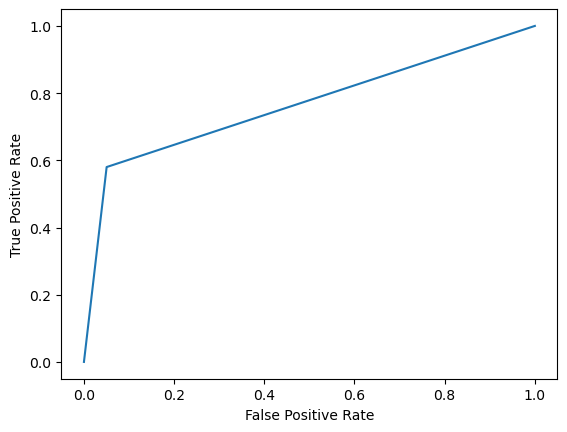

AUC Score: 0.7648268822675545


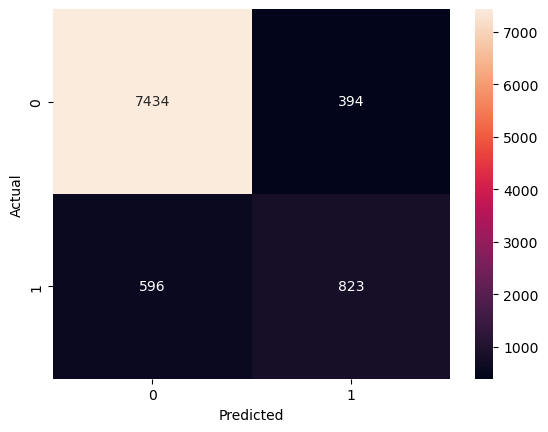

Large gap in score means overfitting: 
0.8984755108660396
0.8929382502433222


In [106]:
#Without SMOTEEN
model = Group3Models.ADABoost_V2()
model.fit(X_train, y_train)
Group3Models.evaluate_model(model, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.878 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.959 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.960 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.931 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.953 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.877 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.966 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.962 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.942 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.960 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.875 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.966 total time=   1.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.968 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.954 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.965 total time=   1.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.872 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.973 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.969 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.957 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.966 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.832 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=100;, score=0.973 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=100;, score=0.971 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=100;, score=0.963 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=100;, score=0.969 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=200;, score=0.802 total time=   1.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=200;, score=0.973 total time=   1.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=200;, score=0.968 total time=   1.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=200;, score=0.965 total time=   1.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=200;, score=0.973 total time=   1.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.817 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.968 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.968 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.960 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.969 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.793 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.971 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.971 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.960 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.974 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.791 total time=   1.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.973 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.971 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.968 total time=   1.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.974 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Score:  0.8697956093868282
Accuracy Score: 0.8697956093868282
Balanced Accuracy Score: 0.8457819151215547
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      7828
        True       0.55      0.81      0.66      1419

    accuracy                           0.87      9247
   macro avg       0.76      0.85      0.79      9247
weighted avg       0.90      0.87      0.88      9247



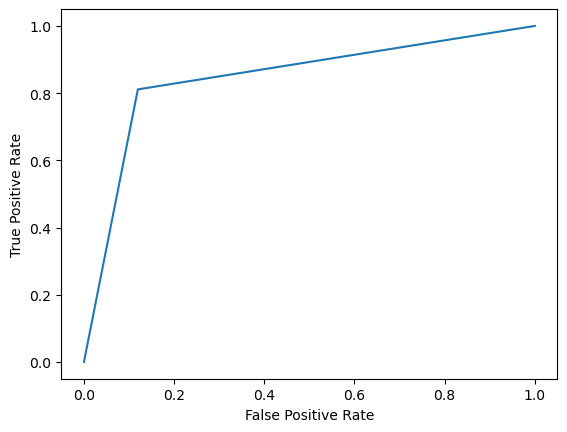

AUC Score: 0.8457819151215547


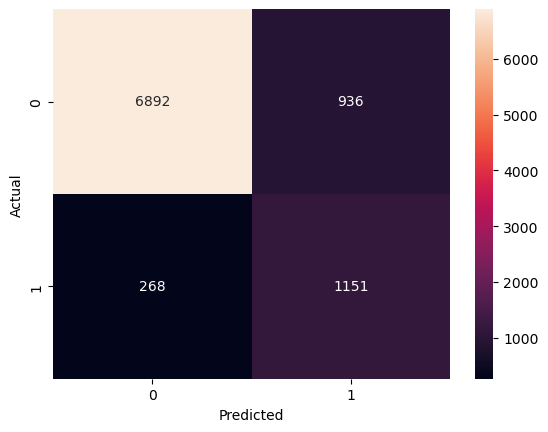

Large gap in score means overfitting: 
0.953907203907204
0.8697956093868282


In [107]:
model = Group3Models.ADABoost_V2()
model.fit(X_train_bal, y_train_bal)
Group3Models.evaluate_model(model, X_train_bal, X_test, y_train_bal, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.875 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.877 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.896 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.888 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.877 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.875 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.909 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.904 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.894 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.883 total time=   1.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.875 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.914 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.907 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.890 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.883 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.874 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.911 total time=   0.1s
[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.896 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.885 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.882 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=100;, score=0.874 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=100;, score=0.903 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=100;, score=0.891 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=100;, score=0.885 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=200;, score=0.883 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=200;, score=0.875 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=200;, score=0.900 total time=   0.7s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=200;, score=0.893 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=200;, score=0.886 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.882 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.878 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.896 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.893 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.878 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.878 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.880 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.896 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.880 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.881 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.878 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.882 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.891 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.883 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.880 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Score:  0.8929382502433222
Accuracy Score: 0.8929382502433222
Balanced Accuracy Score: 0.7648268822675544
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      7828
        True       0.68      0.58      0.62      1419

    accuracy                           0.89      9247
   macro avg       0.80      0.76      0.78      9247
weighted avg       0.89      0.89      0.89      9247



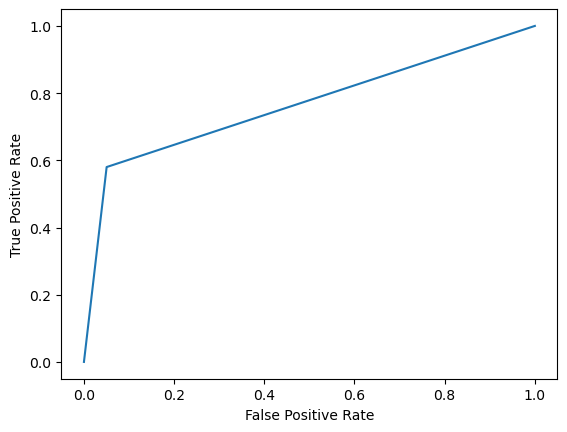

AUC Score: 0.7648268822675545


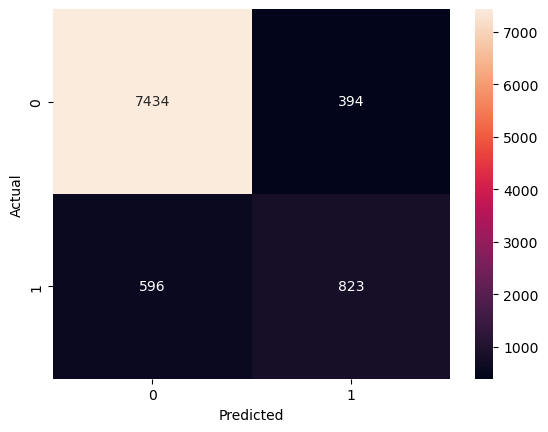

Large gap in score means overfitting: 
0.8984755108660396
0.8929382502433222


In [108]:
#Without SMOTEEN
model = Group3Models.ADABoost_V3()
model.fit(X_train, y_train)
Group3Models.evaluate_model(model, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=50;, score=0.878 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=50;, score=0.959 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=50;, score=0.960 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=50;, score=0.931 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=50;, score=0.953 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.877 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.966 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.962 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.942 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.960 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.875 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.966 total time=   0.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.968 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.954 total time=   1.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.965 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=50;, score=0.872 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=50;, score=0.973 total time=   0.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=50;, score=0.969 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=50;, score=0.957 total time=   0.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=50;, score=0.966 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=100;, score=0.832 total time=   1.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=100;, score=0.973 total time=   1.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=100;, score=0.971 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=100;, score=0.963 total time=   1.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=100;, score=0.969 total time=   1.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END learning_rate=0.5, n_estimators=200;, score=0.802 total time=   1.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END learning_rate=0.5, n_estimators=200;, score=0.973 total time=   1.2s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END learning_rate=0.5, n_estimators=200;, score=0.968 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END learning_rate=0.5, n_estimators=200;, score=0.965 total time=   1.9s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END learning_rate=0.5, n_estimators=200;, score=0.973 total time=   1.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.817 total time=   0.8s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.968 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.968 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.960 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.969 total time=   0.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=100;, score=0.793 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=100;, score=0.971 total time=   0.4s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=100;, score=0.971 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=100;, score=0.960 total time=   0.5s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=100;, score=0.974 total time=   0.6s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/5] END .learning_rate=1, n_estimators=200;, score=0.791 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/5] END .learning_rate=1, n_estimators=200;, score=0.973 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/5] END .learning_rate=1, n_estimators=200;, score=0.971 total time=   1.1s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 4/5] END .learning_rate=1, n_estimators=200;, score=0.968 total time=   1.3s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 5/5] END .learning_rate=1, n_estimators=200;, score=0.974 total time=   1.0s


c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Score:  0.8697956093868282
Accuracy Score: 0.8697956093868282
Balanced Accuracy Score: 0.8457819151215547
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      7828
        True       0.55      0.81      0.66      1419

    accuracy                           0.87      9247
   macro avg       0.76      0.85      0.79      9247
weighted avg       0.90      0.87      0.88      9247



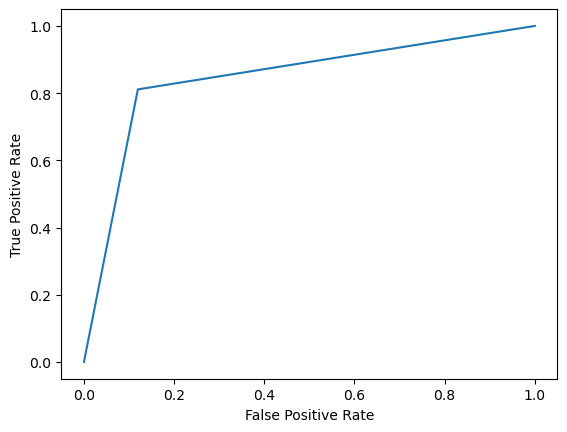

AUC Score: 0.8457819151215547


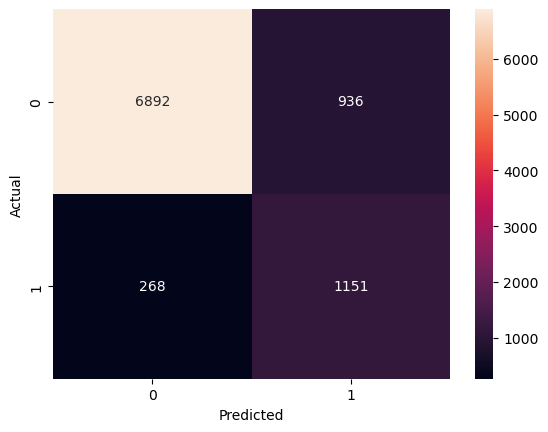

Large gap in score means overfitting: 
0.953907203907204
0.8697956093868282


In [109]:
model = Group3Models.ADABoost_V3()
model.fit(X_train_bal, y_train_bal)
model.best_estimator_
Group3Models.evaluate_model(model.best_estimator_, X_train_bal, X_test, y_train_bal, y_test)

#### Logistic Regression

c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: 
{'C': 10, 'solver': 'lbfgs'}
Model Score:  0.8929382502433222
Accuracy Score: 0.8929382502433222
Balanced Accuracy Score: 0.716937950286336
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      7828
        True       0.74      0.46      0.57      1419

    accuracy                           0.89      9247
   macro avg       0.83      0.72      0.75      9247
weighted avg       0.88      0.89      0.88      9247



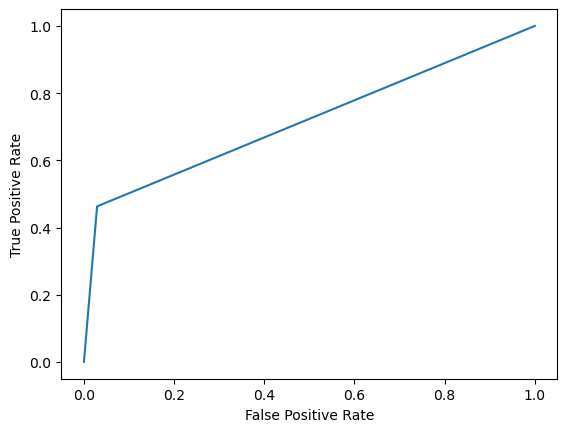

AUC Score: 0.716937950286336


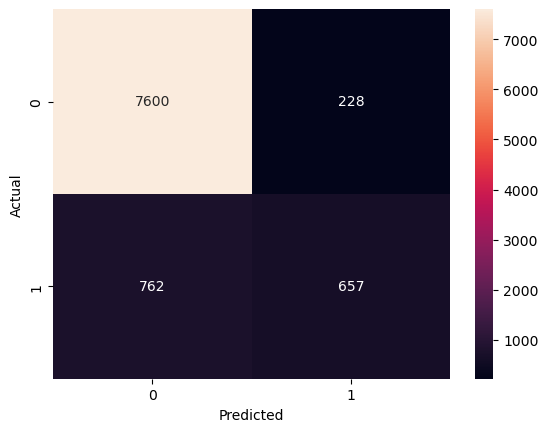

Large gap in score means overfitting: 
0.8809601037950049
0.8929382502433222


In [110]:
#without SMOTEENN
model = Group3Models.model_logistic_regression_v1(X_train, y_train)
Group3Models.evaluate_model(model, X_train, X_test, y_train, y_test)

Best Parameters: 
{'C': 100, 'solver': 'liblinear'}
Model Score:  0.8667676003028009
Accuracy Score: 0.8667676003028009
Balanced Accuracy Score: 0.8096634459051424
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      7828
        True       0.55      0.73      0.63      1419

    accuracy                           0.87      9247
   macro avg       0.75      0.81      0.77      9247
weighted avg       0.89      0.87      0.87      9247



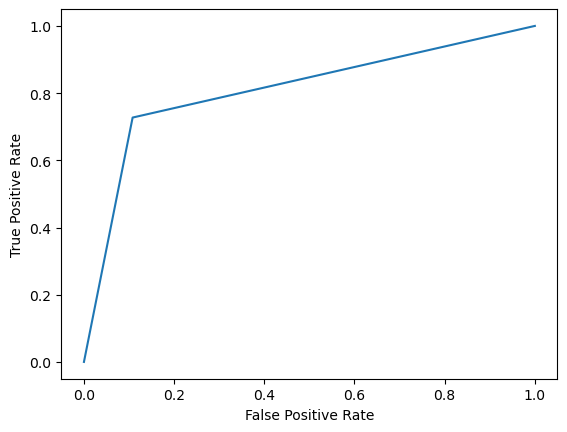

AUC Score: 0.8096634459051424


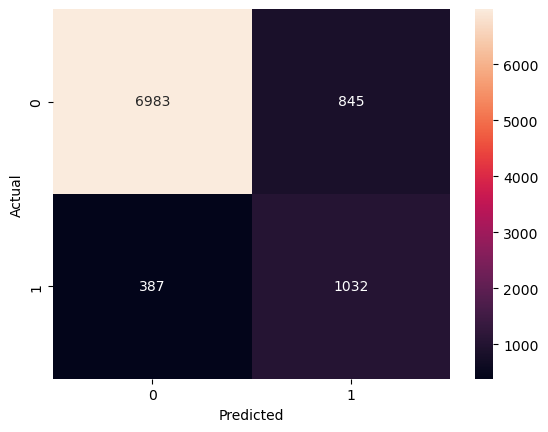

Large gap in score means overfitting: 
0.9468864468864469
0.8667676003028009


In [111]:
model = Group3Models.model_logistic_regression_v1(X_train_bal, y_train_bal)
Group3Models.evaluate_model(model, X_train_bal, X_test, y_train_bal, y_test)

c:\Users\donal\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: 
{'C': 200, 'solver': 'lbfgs'}
Model Score:  0.8881799502541364
Accuracy Score: 0.8881799502541364
Balanced Accuracy Score: 0.699991636607066
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      7828
        True       0.73      0.43      0.54      1419

    accuracy                           0.89      9247
   macro avg       0.82      0.70      0.74      9247
weighted avg       0.88      0.89      0.88      9247



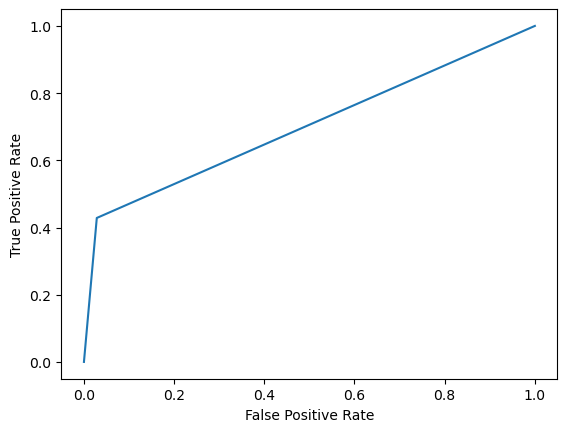

AUC Score: 0.6999916366070661


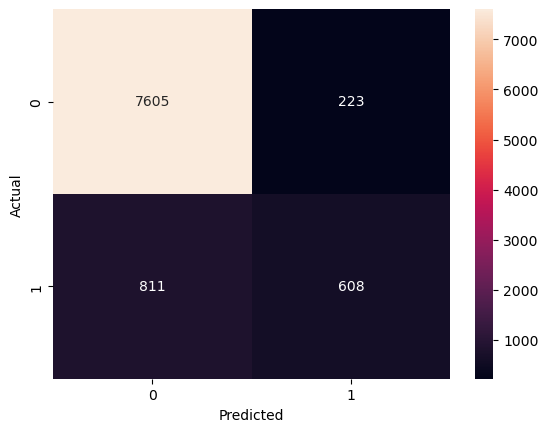

Large gap in score means overfitting: 
0.8819331819656179
0.8881799502541364


In [112]:
#without SMOTEENN
model = Group3Models.model_logistic_regression_v2(X_train, y_train)
Group3Models.evaluate_model(model, X_train, X_test, y_train, y_test)

Best Parameters: 
{'C': 100, 'solver': 'liblinear'}
Model Score:  0.8667676003028009
Accuracy Score: 0.8667676003028009
Balanced Accuracy Score: 0.8096634459051424
              precision    recall  f1-score   support

       False       0.95      0.89      0.92      7828
        True       0.55      0.73      0.63      1419

    accuracy                           0.87      9247
   macro avg       0.75      0.81      0.77      9247
weighted avg       0.89      0.87      0.87      9247



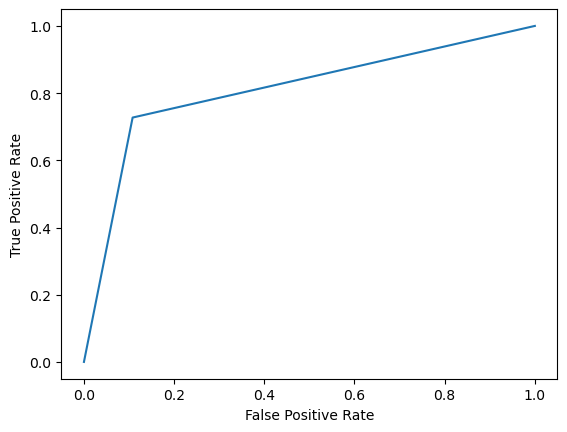

AUC Score: 0.8096634459051424


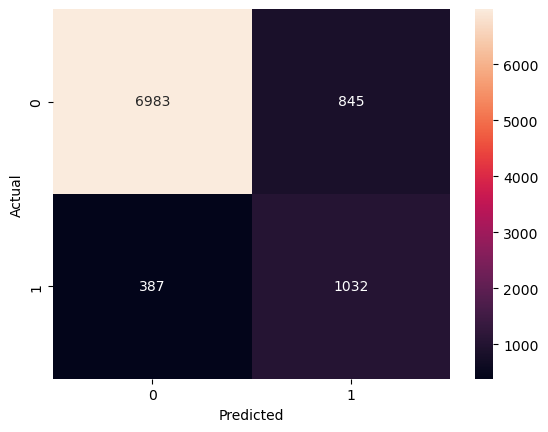

Large gap in score means overfitting: 
0.9468864468864469
0.8667676003028009


In [113]:
model = Group3Models.model_logistic_regression_v2(X_train_bal, y_train_bal)
Group3Models.evaluate_model(model, X_train_bal, X_test, y_train_bal, y_test)

#### Pipeline Logistic Regression

In [114]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize data
    ('model', LogisticRegression())  # Train classifier
])

Model Score:  0.8873148048015572
Accuracy Score: 0.8873148048015572
Balanced Accuracy Score: 0.6919799743102497
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      7828
        True       0.74      0.41      0.53      1419

    accuracy                           0.89      9247
   macro avg       0.82      0.69      0.73      9247
weighted avg       0.88      0.89      0.87      9247



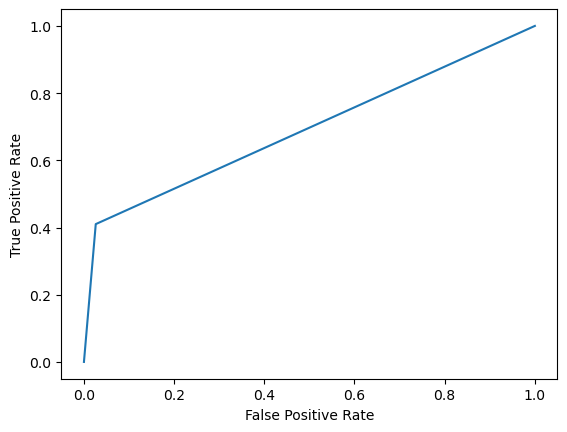

AUC Score: 0.6919799743102497


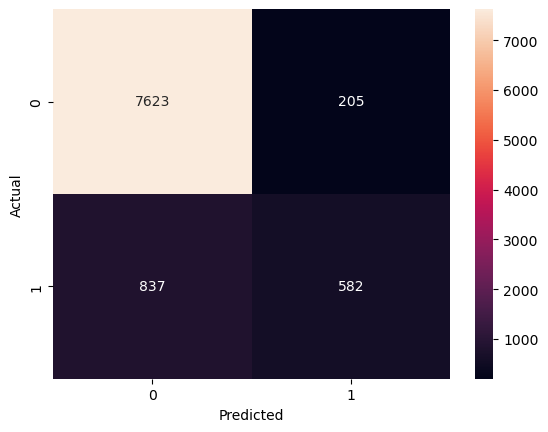

Large gap in score means overfitting: 
0.8803113850145962
0.8873148048015572


In [115]:
pipeline.fit(X_train, y_train)

Group3Models.evaluate_model(pipeline, X_train, X_test, y_train, y_test)


Model Score:  0.8652535957607873
Accuracy Score: 0.8652535957607873
Balanced Accuracy Score: 0.795498793114686
              precision    recall  f1-score   support

       False       0.94      0.90      0.92      7828
        True       0.55      0.69      0.61      1419

    accuracy                           0.87      9247
   macro avg       0.74      0.80      0.77      9247
weighted avg       0.88      0.87      0.87      9247



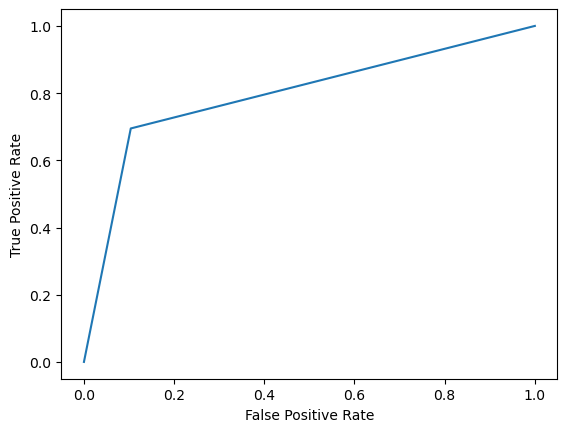

AUC Score: 0.7954987931146859


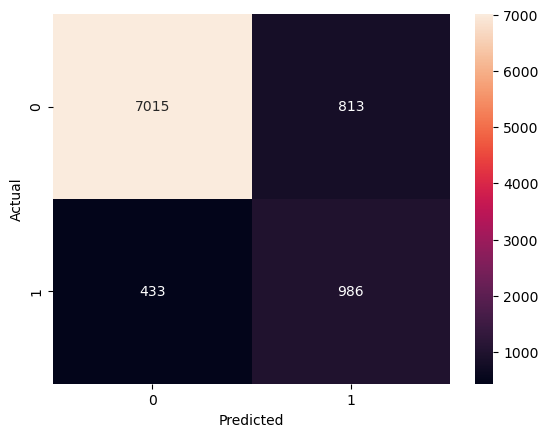

Large gap in score means overfitting: 
0.9416971916971917
0.8652535957607873


In [116]:
pipeline.fit(X_train_bal, y_train_bal)

Group3Models.evaluate_model(pipeline, X_train_bal, X_test, y_train_bal, y_test)



Model Score:  0.9024548502216935
Accuracy Score: 0.9024548502216935
Balanced Accuracy Score: 0.7566003284859864
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      7828
        True       0.75      0.55      0.63      1419

    accuracy                           0.90      9247
   macro avg       0.84      0.76      0.79      9247
weighted avg       0.90      0.90      0.90      9247



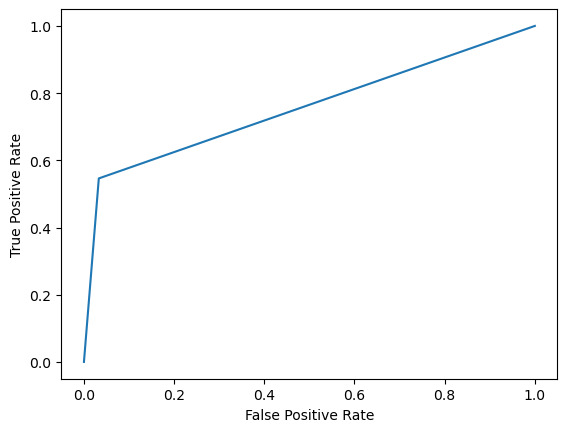

AUC Score: 0.7566003284859864


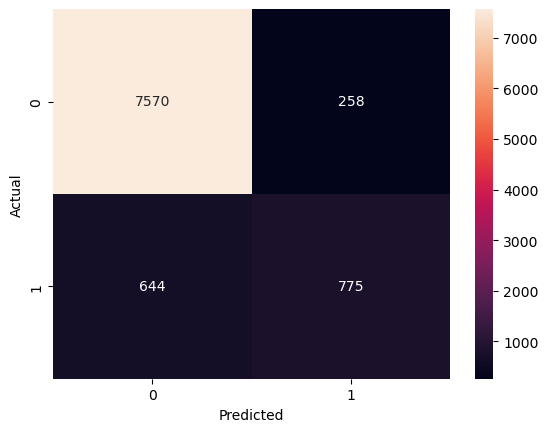

Large gap in score means overfitting: 
1.0
0.9024548502216935
Administrative                             3
Administrative_Duration                142.5
Informational                              0
Informational_Duration                   0.0
ProductRelated                            48
ProductRelated_Duration          1052.255952
BounceRates                        -0.380327
ExitRates                          -0.619539
PageValues                          -0.32194
SpecialDay                               0.0
OperatingSystems                           1
Browser                                    8
Region                                     6
TrafficType                               11
Weekend                                False
VisitorType_New_Visitor                False
VisitorType_Other                      False
VisitorType_Returning_Visitor           True
Month_Aug                              False
Month_Dec                              False
Month_Feb                             

In [117]:
model = Group3Models.model_random_forest_model_V1(X_train, y_train)
Group3Models.evaluate_model(model, X_train, X_test, y_train, y_test)
print(X_train.iloc[0])


Model Score:  0.8744457661944415
Accuracy Score: 0.8744457661944415
Balanced Accuracy Score: 0.8450666154600155
              precision    recall  f1-score   support

       False       0.96      0.89      0.92      7828
        True       0.56      0.80      0.66      1419

    accuracy                           0.87      9247
   macro avg       0.76      0.85      0.79      9247
weighted avg       0.90      0.87      0.88      9247



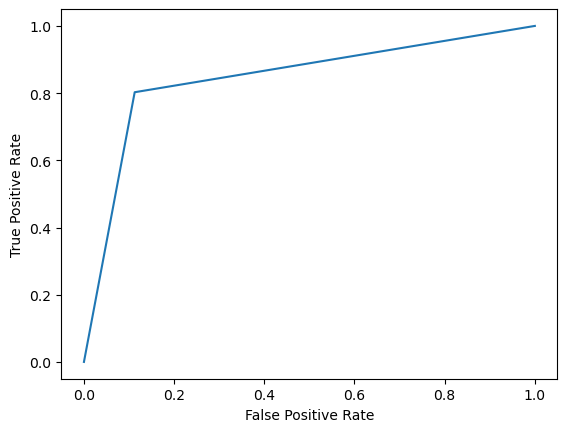

AUC Score: 0.8450666154600155


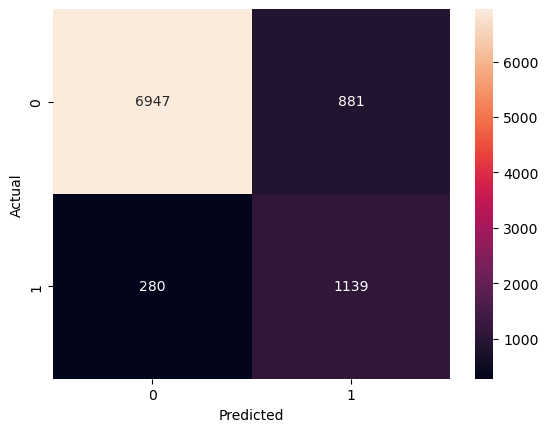

Large gap in score means overfitting: 
1.0
0.8744457661944415


In [118]:
model = Group3Models.model_random_forest_model_V1(X_train_bal, y_train_bal)
Group3Models.evaluate_model(model, X_train_bal, X_test, y_train_bal, y_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: 
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Model Score:  0.9018059911322591
Accuracy Score: 0.9018059911322591
Balanced Accuracy Score: 0.7501588504502908
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      7828
        True       0.76      0.53      0.62      1419

    accuracy                           0.90      9247
   macro avg       0.84      0.75      0.78      9247
weighted avg       0.89      0.90      0.89      9247



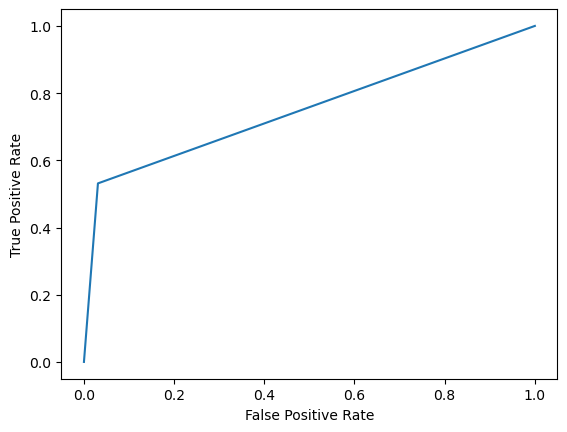

AUC Score: 0.750158850450291


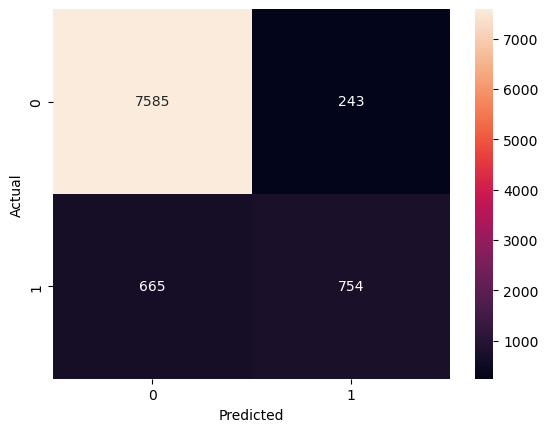

Large gap in score means overfitting: 
0.9779435614661044
0.9018059911322591


In [119]:
model = Group3Models.model_random_forest_model_V2(X_train, y_train)
Group3Models.evaluate_model(model, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: 
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Model Score:  0.8784470639126203
Accuracy Score: 0.8784470639126203
Balanced Accuracy Score: 0.8419486633515582
              precision    recall  f1-score   support

       False       0.96      0.89      0.93      7828
        True       0.58      0.79      0.67      1419

    accuracy                           0.88      9247
   macro avg       0.77      0.84      0.80      9247
weighted avg       0.90      0.88      0.89      9247



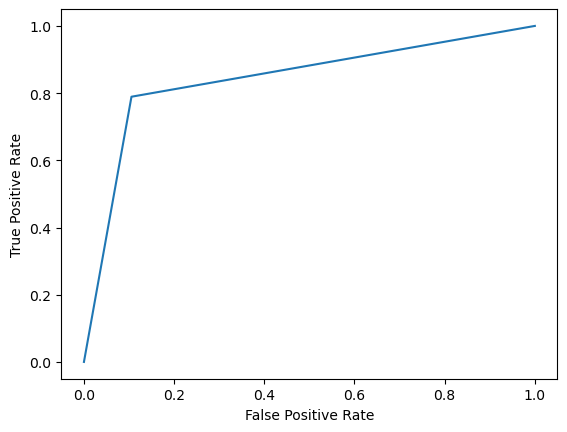

AUC Score: 0.8419486633515582


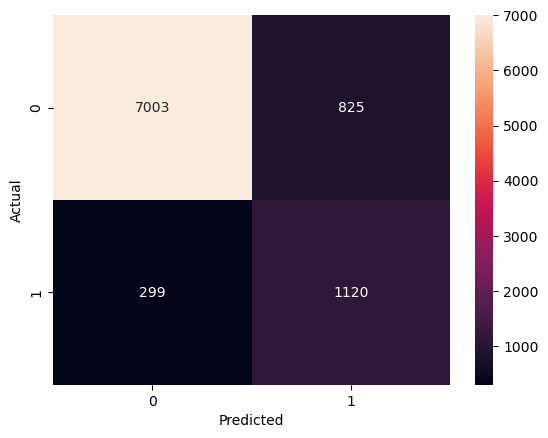

Large gap in score means overfitting: 
1.0
0.8784470639126203


['best_model_random_forest_balanced_hyperparameter_tuned.pkl']

In [120]:
model = Group3Models.model_random_forest_model_V2(X_train_bal, y_train_bal)
Group3Models.evaluate_model(model, X_train_bal, X_test, y_train_bal, y_test)
dump(model, 'best_model_random_forest_balanced_hyperparameter_tuned.pkl')

In [121]:
# Check columns before transformation
print("Columns before scaling and encoding:")
print(X_train.columns)

# Check columns after transformation
print("Columns after scaling and encoding:")
print(X_train.columns)

Columns before scaling and encoding:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')
Columns after scaling and encoding:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', '